### **Import package**

In [0]:
import tensorflow.keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
dir_path = '/content/drive/My Drive/CS280 final project/dataset'
import pickle

Using TensorFlow backend.


### **Define the network**

In [0]:
# AlexNet structure available here 
# https://github.com/pytorch/vision/blob/master/torchvision/models/alexnet.py

class AlexNet_softmax:
    @staticmethod
    def build(img_height, img_width, categories):
        model = Sequential()
        # conv1 input size 227*227*3
        model.add(Conv2D(input_shape=(img_height, img_width, 3), filters=64, 
                        kernel_size=(11,11), strides=(4,4), activation='relu', padding='valid'))
        #normalization1
        #model.add(BatchNormalization())
        # maxpool1
        model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
        # conv2
        model.add(Conv2D(filters=192, kernel_size=(5,5), strides=(1,1),
                        activation='relu', padding='same'))
        #normalization2
        #model.add(BatchNormalization())
        # maxpool2
        model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
        # conv3
        model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1),
                        activation = 'relu', padding='same'))
        # conv4
        model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), 
                        activation = 'relu', padding='same'))
        # conv5
        model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), 
                        activation = 'relu', padding='same'))
        # maxpool3
        model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
        # flatten before passing into fully connected layer
        model.add(Flatten())
        # fc1
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(Dropout(0.4))
        # fc2
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(Dropout(0.4))
        # fc3
        model.add(Dense(1000))
        model.add(Activation('relu'))
        model.add(Dropout(0.4))
        # classifier layer using softmax
        model.add(Dense(categories))
        model.add(Activation('softmax'))

        model.summary()
        return model

class AlexNet_SVM:
    @staticmethod
    def build(img_height, img_width, categories):
        model = Sequential()
        # conv1 input size 227*227*3
        model.add(Conv2D(input_shape=(img_height, img_width, 3), filters=64, 
                        kernel_size=(11,11), strides=(4,4), activation='relu', padding='valid'))
        #normalization1
        #model.add(BatchNormalization())
        # maxpool1
        model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
        # conv2
        model.add(Conv2D(filters=192, kernel_size=(5,5), strides=(1,1),
                        activation='relu', padding='same'))
        #normalization2
        #model.add(BatchNormalization())
        # maxpool2
        model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
        # conv3
        model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1),
                        activation = 'relu', padding='same'))
        # conv4
        model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), 
                        activation = 'relu', padding='same'))
        # conv5
        model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), 
                        activation = 'relu', padding='same'))
        # maxpool3
        model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
        # flatten before passing into fully connected layer
        model.add(Flatten())
        # fc1
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(Dropout(0.4))
        # fc2
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(Dropout(0.4))
        # fc3
        model.add(Dense(1000))
        model.add(Activation('relu'))
        model.add(Dropout(0.4))
        # classifier layer using svm
        model.add(Dense(categories, kernel_regularizer=l2(0.01)))
        model.add(Activation('linear'))

        model.summary()
        return model


In [0]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
train_datagen=ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=0.1,
                         rescale=1./255,
                         shear_range = 0.1,
                         zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1)

val_datagen=ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_generator=train_datagen.flow_from_directory(dir_path,
                                                  target_size=(227,227),
                                                  batch_size=128,
                                                  class_mode='categorical',
                                                  subset='training',
                                                  seed = 30)

val_generator=val_datagen.flow_from_directory(dir_path,
                                              target_size=(227,227),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset='validation',
                                              seed = 30)
categ = len(train_generator.class_indices)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [0]:
img_height = 227
img_width = 227
eps = 100 # epochs
model = AlexNet_softmax.build(img_width=img_width, img_height=img_height, categories=categ)
model.compile(loss='categorical_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=100,
      validation_data=val_generator,
      validation_steps=val_generator.samples/val_generator.batch_size,
      verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 64)        23296     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 192)       307392    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 192)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       663936    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 256)       884992    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       5

In [0]:
import pickle
# Save the file
pickle.dump(history.history, file = open("/content/drive/My Drive/CS280 final project/history0505_softmax.pickle", "wb"))

In [0]:
model.save('/content/drive/My Drive/CS280 final project/fine_tuned_AlexNet_0505.h5')

In [0]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint1 = ModelCheckpoint('/content/drive/My Drive/CS280 final project/fine_tuned_AlexNet_softmax_0506_after100.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

model_100 = load_model('/content/drive/My Drive/CS280 final project/fine_tuned_AlexNet_0505.h5')
model_100.compile(loss='categorical_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
history = model_100.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=50,
      validation_data=val_generator,
      validation_steps=val_generator.samples/val_generator.batch_size,
      verbose=1,
      callbacks=callbacks_list)

pickle.dump(history.history, file = open("/content/drive/My Drive/CS280 final project/history0506_softmax.pickle", "wb"))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
18/17 [==============================] - ETA: -9s - loss: 0.6099 - acc: 0.8018
Epoch 00001: val_acc improved from -inf to 0.74502, saving model to /content/drive/My Drive/CS280 final project/fine_tuned_AlexNet_softmax_0506_after100.h5
18/17 [==============================] - 898s 50s/step - loss: 0.6099 - acc: 0.8018 - val_loss: 0.8400 - val_acc: 0.7450
Epoch 2/50
18/17 [==============================] - ETA: -2s - loss: 0.3298 - acc: 0.8796
Epoch 00002: val_acc improved from 0.74502 to 0.76892, saving model to /content/drive/My Drive/CS280 final project/fine_tuned_AlexNet_softmax_0506_after100.h5
18/17 [==============================] - 184s 10s/step - loss: 0.3298 - acc: 0.8796 - val_loss: 0.6730 - val_acc: 0.7689
Epoch 3/50
18/17 [==============================] - ETA: -2s - loss: 0.3385 - acc: 0.8792
Epoch 00003: val_acc did not improve from 0.76892
18/17 [==============================] - 180s 1

NameError: ignored

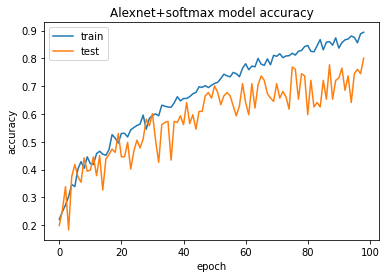

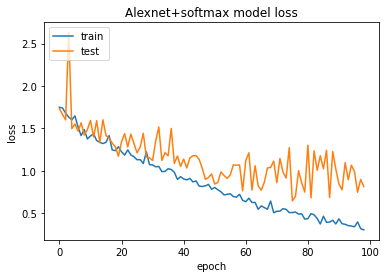

In [0]:
history_before_100 = pickle.load(open('/content/drive/My Drive/CS280 final project/final results/history0505_softmax.pickle', "rb"))
plt.plot(history_before_100['acc'][:-1])
plt.plot(history_before_100['val_acc'][:-1])
plt.title('Alexnet+softmax model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_before_100['loss'][:-1])
plt.plot(history_before_100['val_loss'][:-1])
plt.title('Alexnet+softmax model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()